In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12,8) # set figure size

# Coris data analysis
## We use the same Coris data used in the previous chapter. Now we consider to get the distribution of median LDL for CHD=1

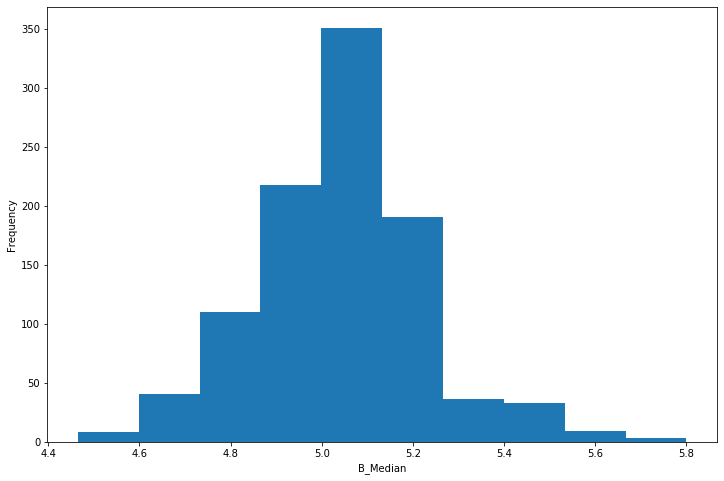

In [3]:
df = pd.read_csv('coris.txt', sep=',', skiprows=[0, 1])
LDL_1 = df[df['chd'] == 1]['ldl']
T_Median = np.median(LDL_1)
B = 1000
B_Median = np.zeros(B)
for i in range(B):
    B_sample = LDL_1.sample(frac=1, replace = True)
    B_Median[i] = np.median(B_sample)
plt.hist(B_Median)
plt.xlabel('B_Median')
plt.ylabel('Frequency');

## Now we get various Bootstrap confidence intervals

In [4]:
def Get_CI(T, B_Sample):
    # Percentile Interval
    CI_Percent = list(np.quantile(B_Sample, q=[0.025, 0.975]))
    # Normal Interval
    se_b = np.std(B_Sample, ddof=1)
    CI_Normal = [T - 1.96*se_b, T + 1.96*se_b]
    # Pivot Interval
    CI_Pivot = [2*T - CI_Percent[1], 2*T - CI_Percent[0]]

    re = {'CI_Percent(2.5%, 97.5%)':CI_Percent, 'CI_Normal(2.5%, 97.5%)':CI_Normal, 'CI_Pivot(2.5%, 97.5%)':CI_Pivot}
    return re

Get_CI(T_Median, B_Median)

{'CI_Percent(2.5%, 97.5%)': [4.675, 5.47],
 'CI_Normal(2.5%, 97.5%)': [4.696912421853405, 5.433087578146594],
 'CI_Pivot(2.5%, 97.5%)': [4.659999999999999, 5.454999999999999]}

# LDL difference between CHD groups
## Now we are interested in checking whether LDL levels are different by CHD groups. Here we use Bootstrap to get the confidence interval.

In [5]:
n = df.shape[0]
T_MeanDiff = np.mean(df[df['chd'] == 1]['ldl']) - np.mean(df[df['chd'] == 0]['ldl'])
T_MeanDiff

1.1436990894039738

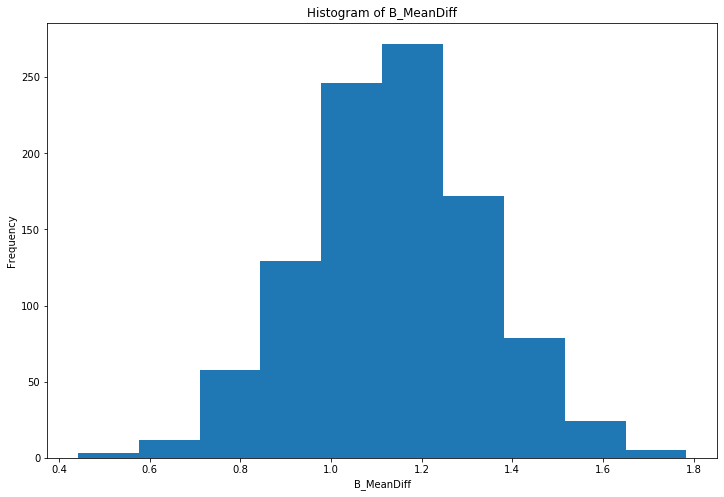

In [6]:
B = 1000
B_MeanDiff = np.zeros(B)

for i in range(B):
    B_sample_idx = np.random.choice(n, size=n, replace=True)
    df1 = df.iloc[B_sample_idx, ]
    mean1 = np.mean(df1[df1['chd'] == 1]['ldl'])
    mean0 = np.mean(df1[df1['chd'] == 0]['ldl'])
    B_MeanDiff[i] = mean1 - mean0
    
plt.hist(B_MeanDiff)
plt.xlabel('B_MeanDiff')
plt.ylabel('Frequency')
plt.title('Histogram of B_MeanDiff');

In [7]:
# Confidence Interval
Get_CI(T_MeanDiff, B_MeanDiff)

{'CI_Percent(2.5%, 97.5%)': [0.757156717578183, 1.5342478570928766],
 'CI_Normal(2.5%, 97.5%)': [0.7589152039916515, 1.528482974816296],
 'CI_Pivot(2.5%, 97.5%)': [0.753150321715071, 1.5302414612297646]}

# Correlation between LDL and sbp
## Now researchers are interested in the correlation between LDL and sbp

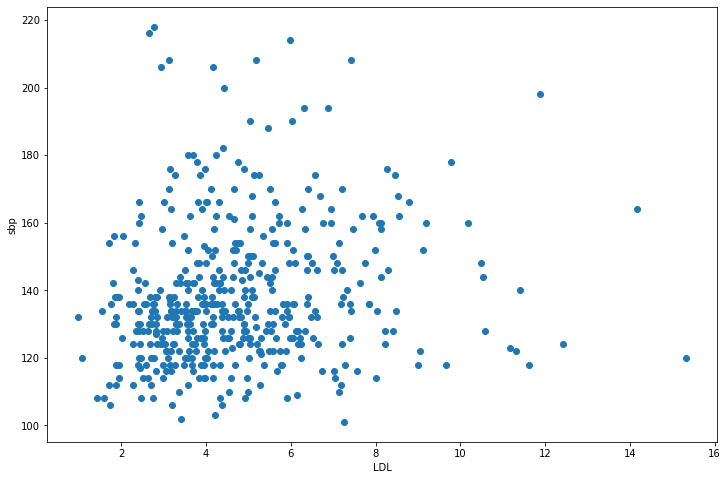

In [8]:
plt.scatter(df['ldl'], df['sbp'])
plt.xlabel('LDL')
plt.ylabel('sbp');

In [9]:
T_Corr = np.corrcoef(df['ldl'], df['sbp'])[0, 1]
T_Corr

0.15829632765601265

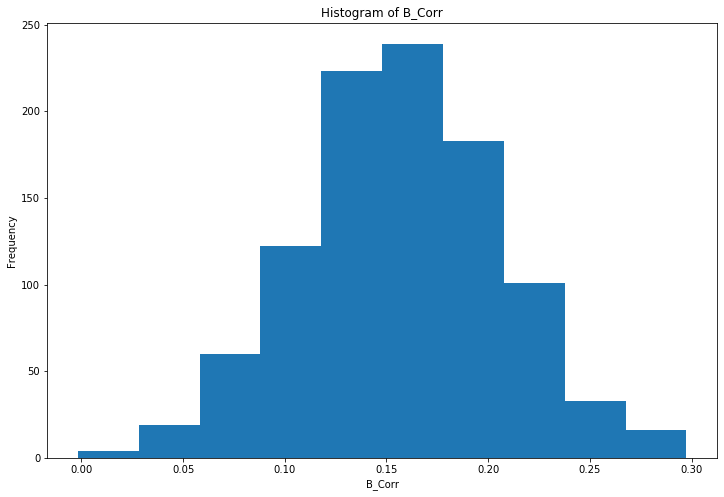

In [10]:
n = df.shape[0]
B = 1000
B_Corr = np.zeros(B)

for i in range(B):
    B_sample_idx = np.random.choice(n, size=n, replace=True)
    df1 = df.iloc[B_sample_idx, ]
    B_Corr[i] = np.corrcoef(df1['ldl'], df1['sbp'])[0, 1]

plt.hist(B_Corr)
plt.xlabel('B_Corr')
plt.ylabel('Frequency')
plt.title('Histogram of B_Corr');

In [11]:
# Percentile Interval
Get_CI(T_Corr, B_Corr)

{'CI_Percent(2.5%, 97.5%)': [0.058889055475705984, 0.2603895949847636],
 'CI_Normal(2.5%, 97.5%)': [0.06096825062003039, 0.2556244046919949],
 'CI_Pivot(2.5%, 97.5%)': [0.05620306032726169, 0.2577035998363193]}